In [81]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting
import seaborn as sns  # statistical data visualization
import warnings # to ignore warnings    
warnings.filterwarnings('ignore')
#%pip install scikit-learn
from sklearn.model_selection import train_test_split # to split the data into training and testing sets
from sklearn.ensemble import RandomForestClassifier # to build the Random Forest model
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve,accuracy_score, recall_score
import joblib # to save the trained model to a file


In [82]:
data = pd.read_csv(r"D:\Project_folder\Heart_Diseases\Raw_Datasets\heart.csv") # load the
data

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [83]:
data.shape # check the shape of the dataset

(303, 14)

In [84]:
data.info() # check for missing values and data types

<class 'pandas.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   sex                  303 non-null    int64  
 2   chest_pain_type      303 non-null    int64  
 3   resting_bp           303 non-null    int64  
 4   cholestoral          303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   restecg              303 non-null    int64  
 7   max_hr               303 non-null    int64  
 8   exang                303 non-null    int64  
 9   oldpeak              303 non-null    float64
 10  slope                303 non-null    int64  
 11  num_major_vessels    303 non-null    int64  
 12  thal                 303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


age - age of the person (in years),

sex - gender of the person (1 = male; 0 = female),

chest_pain_type - type of the chest pain,

Value 0: typical angina,
Value 1: atypical angina,
Value 2: non-anginal pain,
Value 3: asymptomatic,

resting_bp - blood pressure while resting (in mm Hg on admission to the hospital),

cholesterol - A person's serum cholesterol in mg/dl,

fasting_blood_sugar - Blood sugar while fasting & [ > 120 mg/dl ] (1 = true; 0 = false),

restecg - ECG (electrocardiographic ) while resting,
Value 0: normal,
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV),
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria,

max_hr - Maximum heart rate achieved,

exang - exercise-induced angina (1 = yes; 0 = no),

Exercise-induced angina (AP) is a common complaint of cardiac patients, particularly when exercising in the cold. It usually happens during activity (exertion) and goes away with rest or angina medication. For example, pain, when walking uphill or in cold weather, maybe angina. Stable angina pain is predictable and usually similar to previous episodes of chest pain.

oldpeak - ST depression induced by exercise relative to rest,

Exercise-induced ST segment depression is considered a reliable ECG finding for the diagnosis of obstructive coronary atherosclerosis. ST-segment depression is believed as a common electrocardiographic sign of myocardial ischemia during exercise testing. Ischemia is generally defined as oxygen deprivation due to reduced perfusion. ST segment depression less than 0.5 mm is accepted in all leads. ST segment depression 0.5 mm or more is considered pathological.

slope - the slope of the peak exercise ST segment,

Value 0: upsloping,
Value 1: flat,
Value 2: downsloping,

num_major_vessels - no. of major vessels (0-3) colored by flourosopy,

thal - thalassemia,

0: normal,
1: fixed defect,
2: reversable defect,

People with thalassemia can get too much iron in their bodies, either from the disease or from frequent blood transfusions. Too much iron can result in damage to your heart, liver & endocrine system, which includes hormone-producing glands that regulate processes throughout your body.

target -
0 = no disease
1 = disease

In [85]:
data.describe()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [86]:
data.duplicated().sum() # check for duplicate rows

np.int64(1)

In [87]:
data.drop_duplicates(inplace=True) # drop duplicate rows if any

In [88]:
data.isnull().sum() # check for missing values in each column

age                    0
sex                    0
chest_pain_type        0
resting_bp             0
cholestoral            0
fasting_blood_sugar    0
restecg                0
max_hr                 0
exang                  0
oldpeak                0
slope                  0
num_major_vessels      0
thal                   0
target                 0
dtype: int64

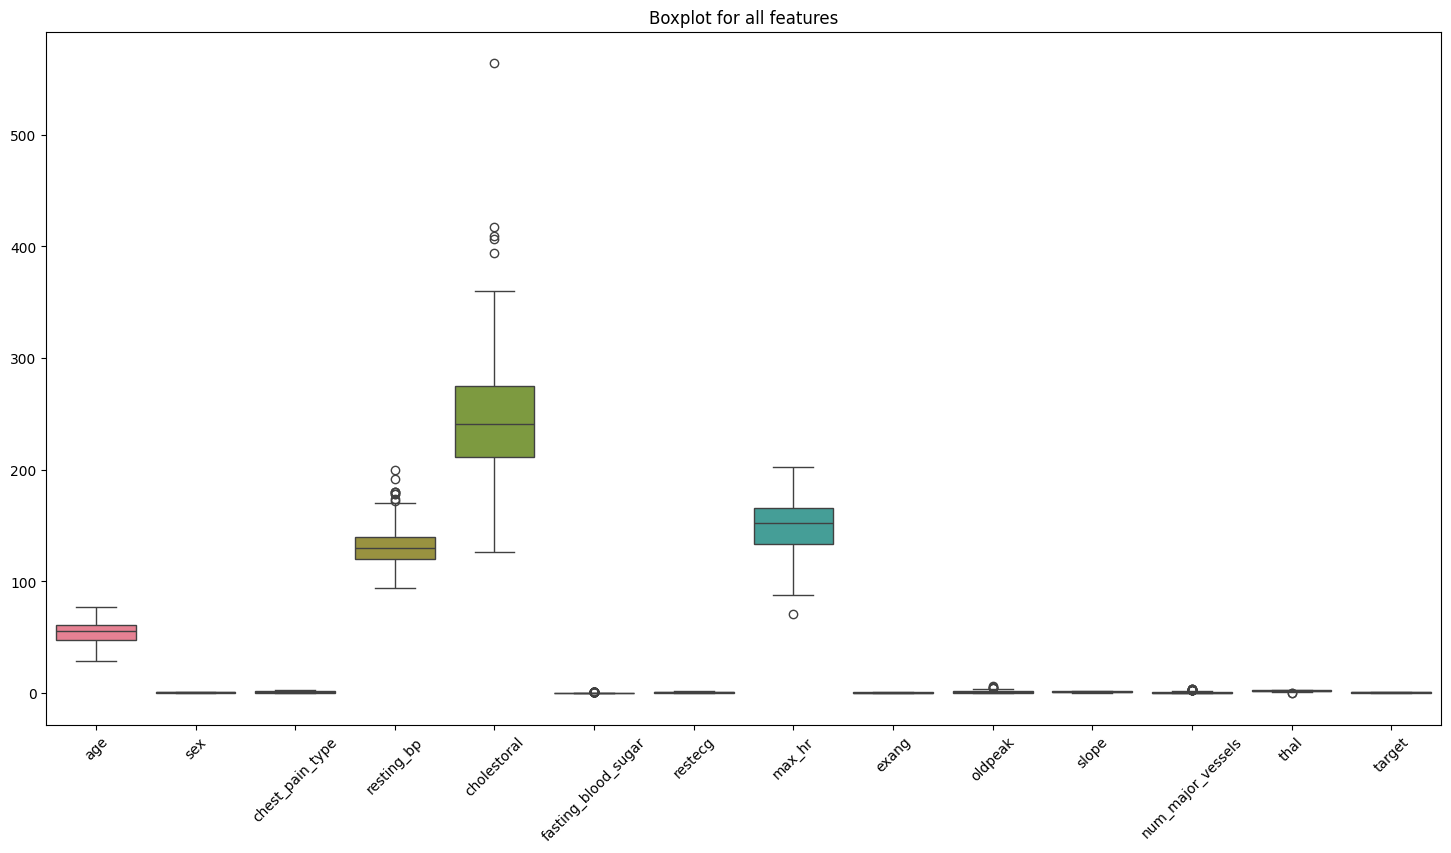

In [89]:
# check for outliers
plt.figure(figsize=(18,9))# set the figure size
sns.boxplot(data=data)# create a boxplot for all features to check for outliers
plt.title('Boxplot for all features')# set the title of the plot
plt.xticks(rotation=45)# rotate x-axis labels for better visibility
plt.show()# display the plot


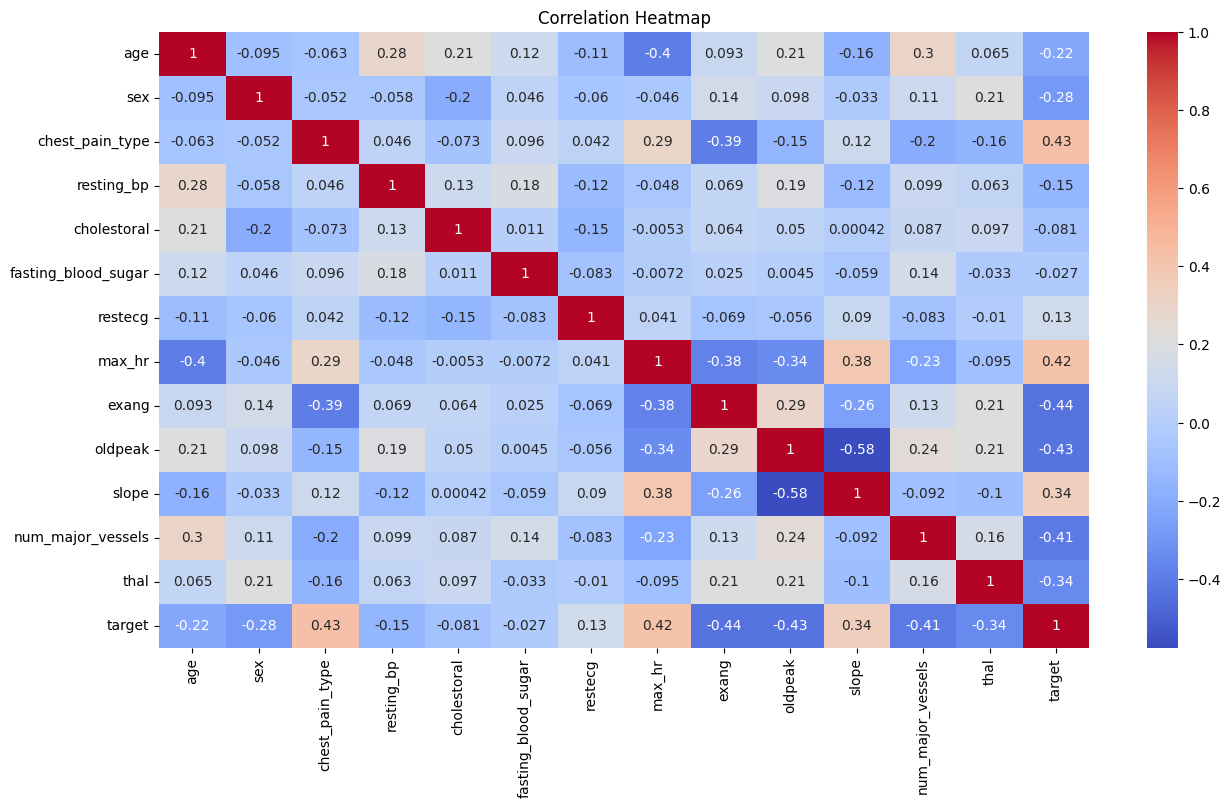

In [90]:
#Checking for correlation
plt.figure(figsize=(15,8))# set the figure size
sns.heatmap(data.corr(), annot= True , cmap="coolwarm")# create a heatmap to visualize the correlation between features
plt.title('Correlation Heatmap')# set the title of the plot
plt.show()# display the plot

In [91]:
X = data.drop('target',axis=1)# separate features (X) from the target variable (y)
y = data['target']# assign the target variable to y

In [92]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)# split the data into training and testing sets with stratification to maintain class distribution

RANDOM FOREST CLASSIFIER

In [93]:
rfc = RandomForestClassifier(# initialize the Random Forest Classifier with specified hyperparameters
    n_estimators=300,# number of trees in the forest
    criterion='gini',# function to measure the quality of a split
    max_depth=8,# maximum depth of the tree
    min_samples_split=5,# minimum number of samples required to split an internal node
    min_samples_leaf=3,# minimum number of samples required to be at a leaf node
    max_features='sqrt',# number of features to consider when looking for the best split
    oob_score=True,# whether to use out-of-bag samples to estimate the generalization accuracy
    random_state=42# seed for reproducibility
)

rfc.fit(X_train,y_train)# fit the model to the training data

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",8
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",5
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",3
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_

In [94]:
print("OOB Score:", rfc.oob_score_)# print the out-of-bag score to evaluate the model's performance on unseen data
print("Train accuracy:", rfc.score(X_train, y_train))# print the training accuracy to evaluate how well the model fits the training data
print("Test accuracy:", rfc.score(X_test, y_test))# print the testing accuracy to evaluate how well the model generalizes to unseen data

OOB Score: 0.8341232227488151
Train accuracy: 0.9383886255924171
Test accuracy: 0.8021978021978022


In [95]:
# use the already trained RandomForestClassifier
model = rfc # assign the trained model to a variable for clarity
y_pred = model.predict(X_test)# make predictions on the test set
y_prob = model.predict_proba(X_test)[:, 1]# get the predicted probabilities for the positive class (class 1) from the model's output

In [96]:
print("Classification Report:\n", classification_report(y_test, y_pred)) # print the classification report to evaluate precision, recall, f1-score, and support for each class
print("ROC AUC Score:", roc_auc_score(y_test, y_prob)) # print the ROC AUC score to evaluate the model's ability to distinguish between classes
print("Recall Score:", classification_report(y_test, y_pred, output_dict=True)['1']['recall']) # print the recall score for the positive class (class 1) to evaluate the model's ability to identify true positives
print("Accuracy Score:", accuracy_score(y_test, y_pred)) # print the accuracy score to evaluate the overall correctness of the model's predictions

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.67      0.76        42
           1       0.76      0.92      0.83        49

    accuracy                           0.80        91
   macro avg       0.82      0.79      0.80        91
weighted avg       0.81      0.80      0.80        91

ROC AUC Score: 0.8974732750242954
Recall Score: 0.9183673469387755
Accuracy Score: 0.8021978021978022


Text(50.722222222222214, 0.5, 'Actual')

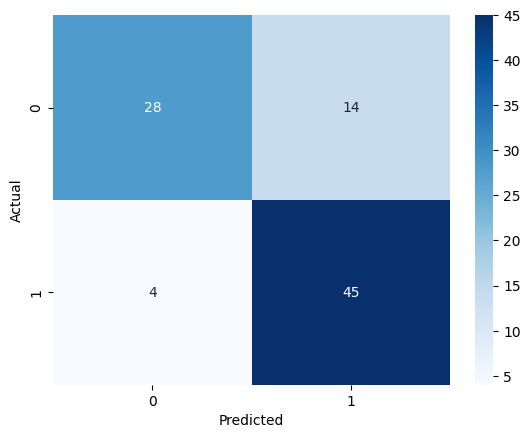

In [97]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred) # compute the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') # visualize the confusion matrix using a heatmap
plt.xlabel('Predicted') # set x-axis label
plt.ylabel('Actual') # set y-axis label

In [98]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print("CV Accuracy:", scores.mean())


CV Accuracy: 0.8342076502732241


In [99]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10],
    'n_estimators': [100, 200]
}

grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
model = grid.best_estimator_


Best Params: {'max_depth': 10, 'n_estimators': 200}


In [100]:

joblib.dump(model, 'heart_disease_model.pkl')# save the trained model to a file named 'heart_disease_model.pkl' for later use


['heart_disease_model.pkl']